## **Problem Statement + Setup**

In [ ]:
# Customer Segmentation using K-Means

Banks want to understand different customer groups so they can design better credit products, reduce risk, and improve marketing.

In this project, we use K-Means clustering to segment customers based on:

- Average credit limit
- Number of credit cards
- Visits to bank branch
- Online interactions
- Calls made to customer care

Goal:
Identify meaningful customer segments and convert them into business insights.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
 

In [2]:
df = pd.read_csv("credit_card_customer_data.csv")

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.shape

(660, 7)

In [6]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [9]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


## **Data Understanding**

In [10]:
df.columns = [
    "sl_no",
    "customer_key",
    "avg_credit_limit",
    "total_credit_cards",
    "total_visits_bank",
    "total_visits_online",
    "total_calls_made"
]

df.head()


,sl_no,customer_key,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [11]:
df.isnull().sum()


sl_no                  0
customer_key           0
avg_credit_limit       0
total_credit_cards     0
total_visits_bank      0
total_visits_online    0
total_calls_made       0
dtype: int64

There are no missing values in the dataset.

In [12]:
df.duplicated().sum()


np.int64(0)

In [13]:
df.describe()


,sl_no,customer_key,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


Avg credit limit varies significantly across customers, showing the population contains both low-limit and premium users.

<Figure size 1200x800 with 0 Axes>

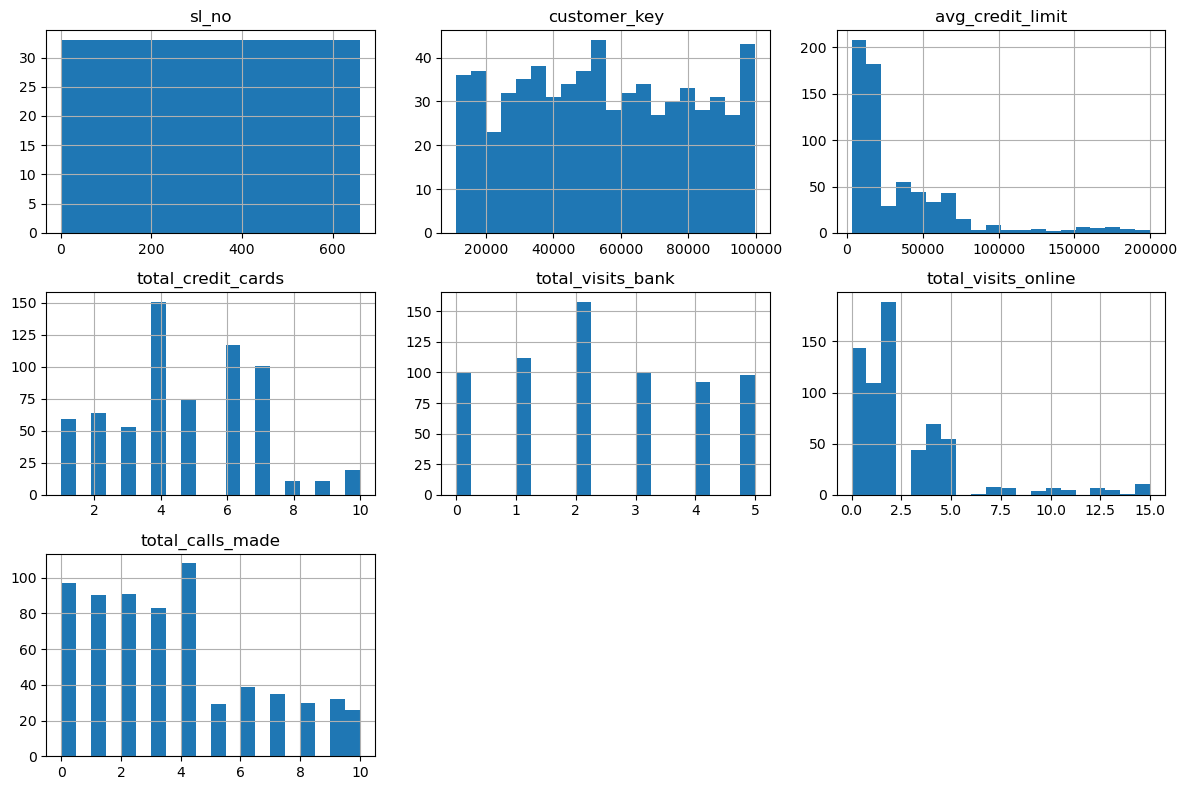

In [15]:
plt.figure(figsize=(12,8))

df.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()


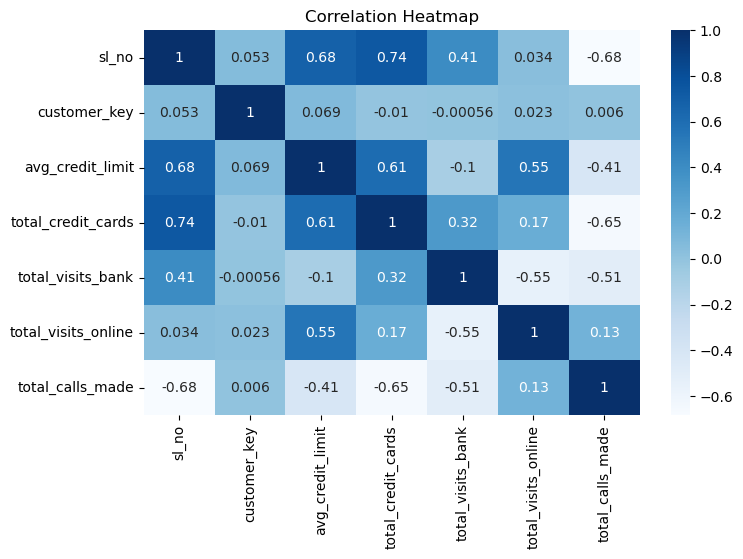

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


## **Data Cleaning**

In [17]:
df1 = df.copy()

In [18]:
df_clean = df1.drop(columns=["sl_no", "customer_key"])

df_clean.head()


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


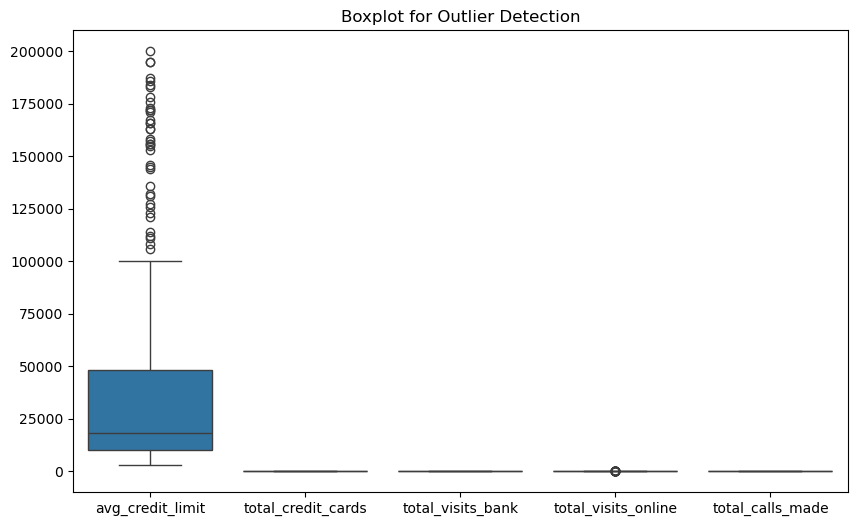

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [23]:
for col in df_clean.columns:
    q1 = df_clean[col].quantile(0.01)
    q99 = df_clean[col].quantile(0.99)
    df_clean[col] = np.clip(df_clean[col], q1, q99)

df_clean.describe()


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34458.914394,4.706061,2.403030,2.606061,3.583333
std,37142.415403,2.167835,1.631813,2.935724,2.865317
min,5000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,178840.500000,10.000000,5.000000,15.000000,10.000000


In [22]:
df.shape


(660, 7)

In [24]:
df1["avg_credit_limit"].max(), df_clean["avg_credit_limit"].max()


(200000, 178840.49999999994)

## **Feature Scaling**

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_clean)

scaled_df = pd.DataFrame(scaled_data, columns=df_clean.columns)

scaled_df.head()


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
0,1.765927,-1.249225,-0.860451,-0.547490,-1.251537
1,0.418736,-0.787585,-1.473731,2.520519,1.891859
2,0.418736,1.058973,-0.860451,0.134290,0.145528
3,-0.120140,0.135694,-0.860451,-0.547490,0.145528
4,1.765927,0.597334,-1.473731,3.202298,-0.203739


In [27]:
scaled_df.describe().round()


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
count,660.0,660.0,660.0,660.0,660.0
mean,0.0,0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-1.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,0.0,-0.0,-0.0,-0.0
75%,0.0,1.0,1.0,0.0,0.0
max,4.0,2.0,2.0,4.0,2.0


## **Choosing The Number Of Clusters**

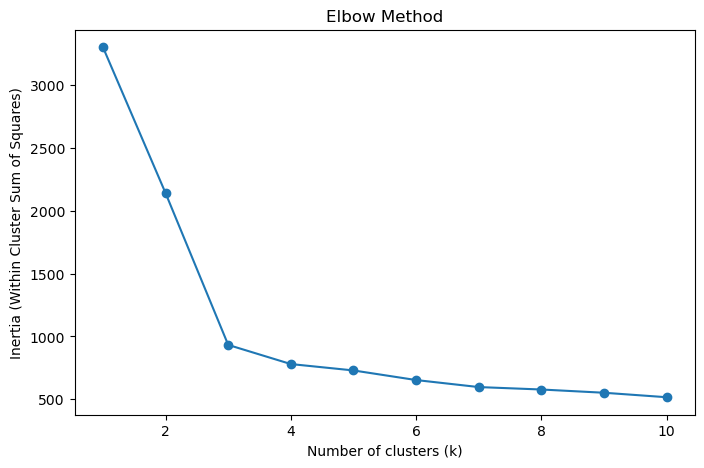

In [30]:
from sklearn.cluster import KMeans

inertia_values = []

K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_df)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within Cluster Sum of Squares)")
plt.title("Elbow Method")
plt.show()


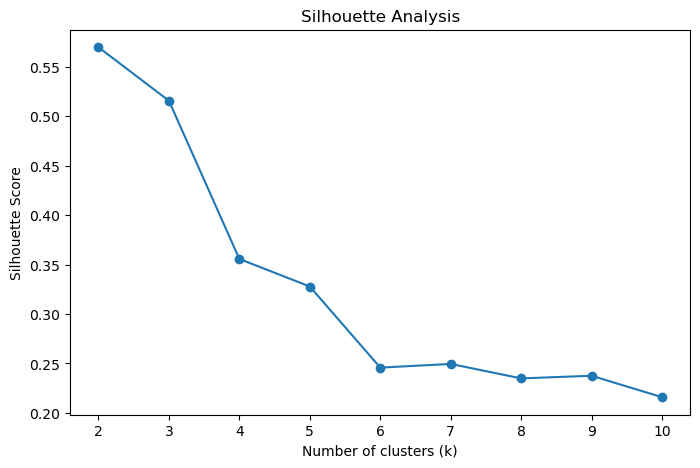

[np.float64(0.5698367509170357),
 np.float64(0.5156747794262672),
 np.float64(0.35569176991164386),
 np.float64(0.32782174342515236),
 np.float64(0.24581530130865242),
 np.float64(0.2495417571983566),
 np.float64(0.23491638899899583),
 np.float64(0.23757342808022838),
 np.float64(0.2158789932863645)]

In [31]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_df)
    sil = silhouette_score(scaled_df, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

sil_scores


## **Train Final K-Means**

In [32]:
k_final = 3

kmeans = KMeans(n_clusters=k_final, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# add cluster labels to original cleaned dataframe
df_clean["cluster"] = clusters

df_clean.head()


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made,cluster
0,100000.0,2,1,1,0,0
1,50000.0,3,0,10,9,2
2,50000.0,7,1,3,4,0
3,30000.0,5,1,1,4,0
4,100000.0,6,0,12,3,1


In [33]:
cluster_profile = df_clean.groupby("cluster").mean()
cluster_profile


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
cluster,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,139477.670000,8.740000,0.600000,10.900000,1.080000
2,12183.035714,2.410714,0.933036,3.553571,6.870536


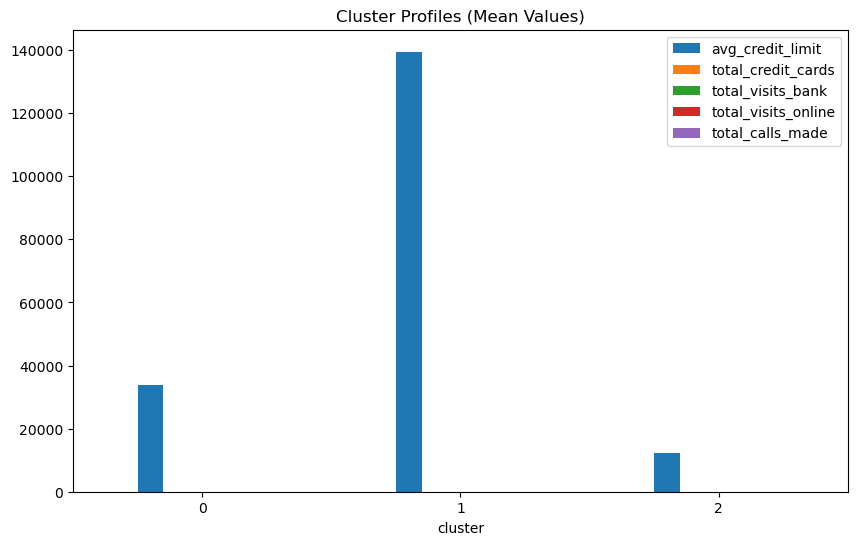

In [34]:
cluster_profile.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles (Mean Values)")
plt.xticks(rotation=0)
plt.show()


In [35]:
scaled_df_with_cluster = scaled_df.copy()
scaled_df_with_cluster["cluster"] = df_clean["cluster"]


In [36]:
cluster_profile_scaled = scaled_df_with_cluster.groupby("cluster").mean()
cluster_profile_scaled


,avg_credit_limit,total_credit_cards,total_visits_bank,total_visits_online,total_calls_made
cluster,,,,,
0,-0.018228,0.373690,0.666395,-0.553672,-0.553005
1,2.829606,1.862226,-1.105763,2.827319,-0.874330
2,-0.600197,-1.059623,-0.901518,0.322997,1.148109


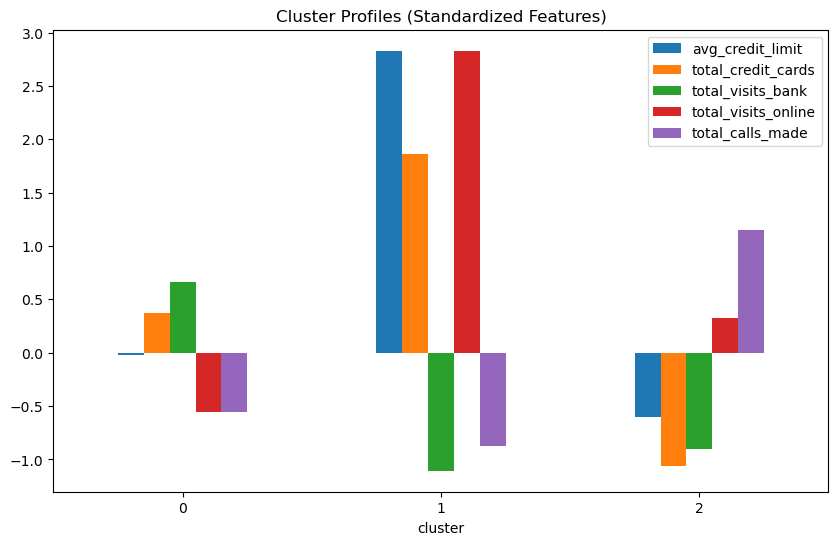

In [37]:
cluster_profile_scaled.plot(kind="bar", figsize=(10,6))
plt.title("Cluster Profiles (Standardized Features)")
plt.xticks(rotation=0)
plt.show()


### Cluster Interpretation

Cluster 0 – Traditional Moderate Users  
• Medium credit limits and number of cards  
• Visit bank branches more than others  
• Low online activity  

Cluster 1 – High-Value Digital Customers  
• Very high credit limits and many cards  
• Heavy online usage  
• Rarely visit branch or call support  

Cluster 2 – Low-Credit, High-Support Users  
• Lowest credit limits and few cards  
• Frequently call customer care  
• Indicate possible dissatisfaction or risk


## **Visualizing Clusters with PCA**

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(
    pca_components,
    columns=["PC1", "PC2"]
)

pca_df["cluster"] = df_clean["cluster"]
pca_df.head()


,PC1,PC2,cluster
0,0.514642,0.533176,0
1,-1.462126,3.106097,2
2,0.528242,0.829158,0
3,-0.361570,0.128249,0
4,1.270630,3.682270,1


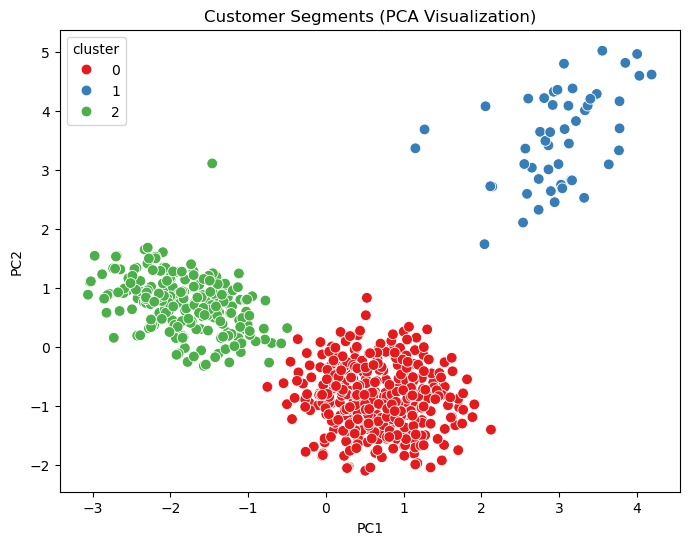

In [39]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="Set1",
    s=60
)

plt.title("Customer Segments (PCA Visualization)")
plt.show()


In [40]:
pca.explained_variance_ratio_


array([0.45789734, 0.37362242])

## 📉 PCA Visualization of Clusters

To visualize the clusters, Principal Component Analysis (PCA) was applied to
reduce the 5-dimensional feature space into two components.

PCA does not change the model — it is only used for visualization.

- PC1 captures the largest amount of variance in the data
- PC2 captures the next largest amount of variance

The scatter plot shows that the clusters are reasonably separated, confirming
that K-Means has captured meaningful structure in the dataset.


## ✨ Cluster Interpretation

After applying K-Means (k = 3), we analyzed the average values of each feature for
every cluster to understand customer behavior patterns.

### 🟢 Cluster 0 — Traditional Moderate Users
- Medium average credit limits  
- Moderate number of credit cards  
- Visit bank branches more frequently  
- Low online usage  
- Few customer care calls  

**Insight:** These users are comfortable with traditional banking and may benefit
from gradual digital adoption programs.

---

### 🔵 Cluster 1 — High-Value Digital Customers
- Very high credit limits  
- Highest number of credit cards  
- Rarely visit the bank in person  
- Very high online usage  
- Fewer support calls  

**Insight:** These are premium customers. Focus on retaining them through
exclusive offers, rewards, and digital-first services.

---

### 🔴 Cluster 2 — Low-Credit, High-Support Users
- Lowest credit limits  
- Fewest credit cards  
- Moderate online usage  
- Highest number of customer care calls  

**Insight:** These customers may be dissatisfied or confused about products.
They may need improved onboarding, education, or issue-resolution support.




## **Saving The Model**

In [41]:
import pickle

# save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# save kmeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [42]:
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

with open("kmeans_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

print("Files loaded successfully!")


Files loaded successfully!


In [43]:
new_customer = pd.DataFrame({
    "avg_credit_limit": [50000],
    "total_credit_cards": [4],
    "total_visits_bank": [2],
    "total_visits_online": [5],
    "total_calls_made": [3]
})

# scale using loaded scaler
new_scaled = loaded_scaler.transform(new_customer)

# predict cluster
loaded_model.predict(new_scaled)


array([0], dtype=int32)

The trained model and scaler were saved so that they can be reused for future
predictions without retraining the entire pipeline. This is an important step
towards making the project production-ready.


## **Final Insights + Recommendations**

## ✅ Final Insights

The K-Means model grouped customers into three meaningful segments:

### 🟢 Cluster 0 – Traditional Moderate Users
- Medium credit limits
- Moderate number of credit cards
- More frequent branch visits
- Low online usage
- Fewer support calls

**Recommendation**
- Encourage digital banking adoption
- Offer simple tutorials and mobile app incentives
- Promote low-risk upgrade products (small credit increases, basic rewards)

---

### 🔵 Cluster 1 – High-Value Digital Customers
- Very high credit limits
- Highest number of cards
- Rarely visit branches
- Very high online activity
- Fewer support calls

**Recommendation**
- Focus on retention programs and loyalty rewards
- Personalized offers (premium cards, travel rewards)
- Maintain excellent digital experience

---

### 🔴 Cluster 2 – Low-Credit, High-Support Users
- Lowest credit limits
- Few credit cards
- Moderate online usage
- Highest customer care calls

**Recommendation**
- Investigate reasons for high support calls
- Provide better onboarding & product education
- Risk monitoring and cautious credit expansion

---

## ⚠️ Limitations
- Dataset is small and limited to behavioral variables only
- No demographic or transaction history features
- K-Means assumes spherical clusters and equal variance

## 🚀 Possible Improvements
- Try other clustering algorithms (DBSCAN, Hierarchical)
- Add more features like spending categories, payment delays, churn
- Use clustering evaluation on unseen data
